In [ ]:
"""
Integrantes:
- Ronald Leonardo Lopez
- Cristian Esteban Peña
"""

from scipy.integrate import quad, dblquad, tplquad
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:

def trapezoid(f, a, b, n):

    xk, dx = np.linspace(a, b, n+1, retstep = True)
    return dx*(0.5*f(xk[0]) + np.sum(f(xk[1:-1])) + 0.5*f(xk[-1])) 
    

In [ ]:

def simpson(f, a, b, n):

    xk, dx = np.linspace(a, b, n + 1, retstep = True)
    return (dx/3)*(f(xk[0]) + 4*np.sum(f(xk[1::2])) + 2*np.sum(f(xk[2:-1:2])) + f(xk[-1]))
    


In [ ]:
def Eliptic1(x):
  
  def arg(t):

    return 1/np.sqrt(1-pow(x*np.sin(t),2))

  Lt = trapezoid(arg, 0, np.pi/2, 10)
  Ls = simpson(arg, 0, np.pi/2 , 10)
  Lv = quad(arg, 0, np.pi/2)

  return [Lt,Ls,Lv]


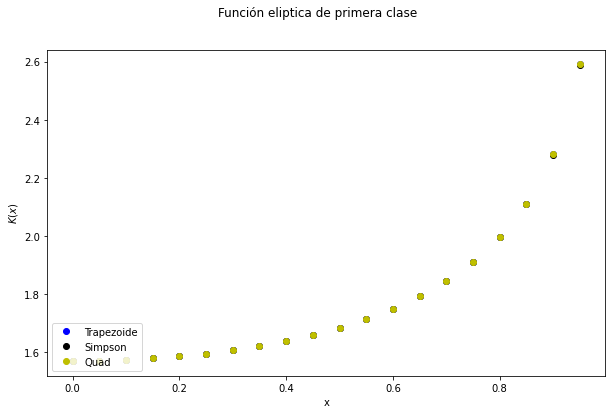

In [ ]:

fig,ax = plt.subplots(figsize=(10, 6))
fig.suptitle("Función eliptica de primera clase")

x = np.arange(0,1,0.05)
yET = [Eliptic1(i)[0] for i in x]
yES = [Eliptic1(i)[1] for i in x]
yEQ = [Eliptic1(i)[2][0] for i in x]


ax.plot(x,yET,"bo", label = "Trapezoide")
ax.plot(x,yES, "ko", label = "Simpson")
ax.plot(x,yEQ, "yo", label = "Quad")

plt.xlabel("x")
plt.ylabel(r'$K(x)$')

ax.legend(loc=3)


In [ ]:
def PseudEliptic(x,f):
  
  arg = lambda t: 1/np.sqrt(1-pow(x*f(t),2))

  Lt = trapezoid(arg, 0, np.pi/2, 10)
  Ls = simpson(arg, 0, np.pi/2 , 10)
  Lv = quad(arg, 0, np.pi/2)

  return [Lt,Ls,Lv]


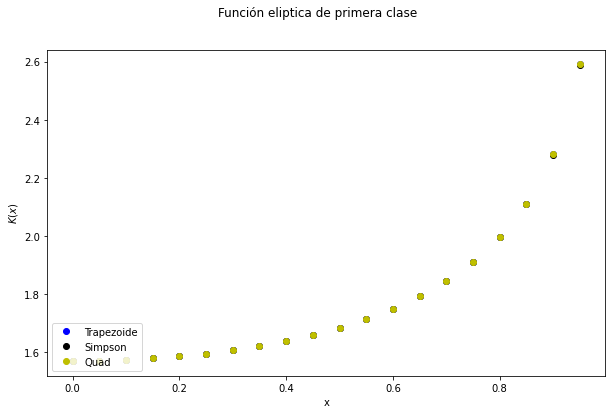

In [ ]:
f = np.sin

fig,ax = plt.subplots(figsize=(10, 6))
fig.suptitle("Función eliptica de primera clase")

x = np.arange(0,1,0.05)
yET = [PseudEliptic(i,f)[0] for i in x]
yES = [PseudEliptic(i,f)[1] for i in x]
yEQ = [PseudEliptic(i,f)[2][0] for i in x]


ax.plot(x,yET,"bo", label = "Trapezoide")
ax.plot(x,yES, "ko", label = "Simpson")
ax.plot(x,yEQ, "yo", label = "Quad")

plt.xlabel("x")
plt.ylabel(r'$K(x)$')

ax.legend(loc=3)
